<a href="https://colab.research.google.com/github/NerusuSahithi011/NLP/blob/main/lab_assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Loading pre-trained embeddings
import gensim.downloader as api

# Numerical operations
import numpy as np

# Data handling (optional but useful)
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Dimensionality reduction
from sklearn.manifold import TSNE


In [7]:
# Load pre-trained Word2Vec model
model = api.load("word2vec-google-news-300")

# Print vocabulary size
print("Vocabulary Size:", len(model.key_to_index))

# Display one example vector
print("Vector for 'king':\n", model['king'])
print("Vector Dimension:", len(model['king']))


Vocabulary Size: 3000000
Vector for 'king':
 [ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e

In [8]:
words = [
    # Animals
    "cat", "dog", "lion", "tiger", "elephant", "wolf", "monkey", "horse",

    # Cities
    "Paris", "London", "Delhi", "Mumbai", "Tokyo", "Berlin", "Rome", "New_York",

    # Royalty
    "king", "queen", "prince", "princess", "man", "woman", "boy", "girl",

    # Technology
    "computer", "laptop", "keyboard", "mouse", "internet", "software", "hardware", "AI",

    # Fruits
    "apple", "banana", "mango", "grape", "orange", "pineapple", "pear", "peach"
]


In [9]:
vectors = []

for word in words:
    if word in model:
        vectors.append(model[word])

vectors = np.array(vectors)
print("Shape of vectors:", vectors.shape)


Shape of vectors: (40, 300)


In [10]:
tsne = TSNE(n_components=2, random_state=42, perplexity=10)

reduced_vectors = tsne.fit_transform(vectors)

print("Reduced Shape:", reduced_vectors.shape)


Reduced Shape: (40, 2)


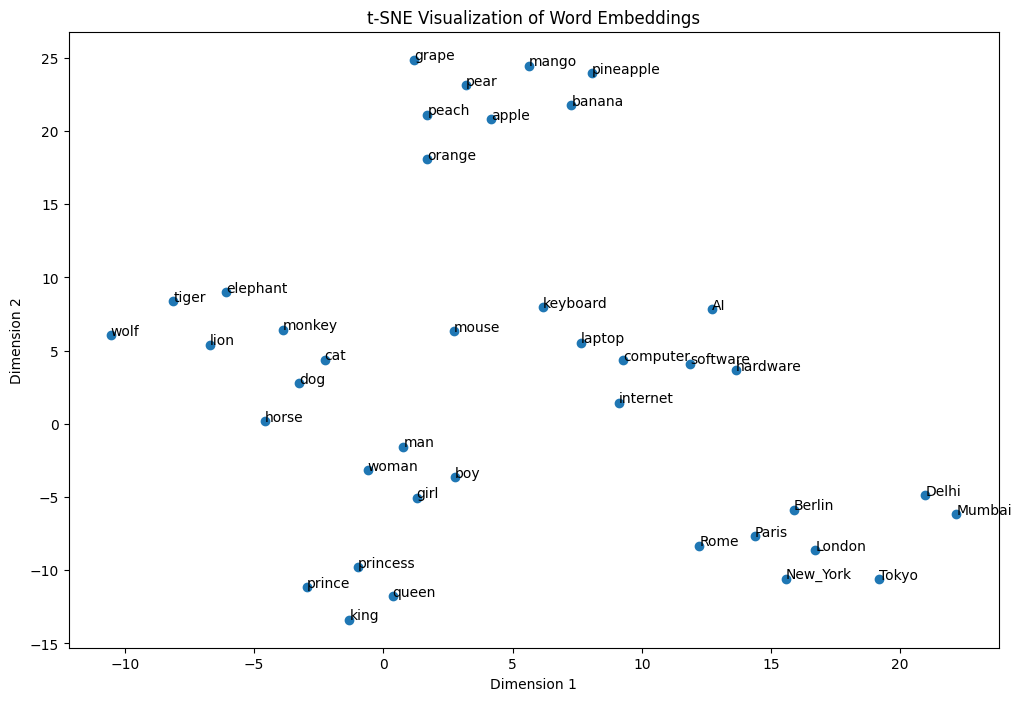

In [11]:
plt.figure(figsize=(12, 8))

x = reduced_vectors[:, 0]
y = reduced_vectors[:, 1]

plt.scatter(x, y)

for i, word in enumerate(words):
    plt.annotate(word, (x[i], y[i]))

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
